In [1]:
# load required libraries
options(stringsAsFactors = F)
options (repr.plot.width = 12, repr.plot.height = 5)
suppressPackageStartupMessages({
library(Seurat)
library(harmony)
library(ggplot2)
library(ggpubr)
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)
library(dplyr)
library(Matrix)
library(Hmisc)
library(ggsci)
library(viridis)
library(RColorBrewer)
library(ggrepel)
library(cowplot)
})
set.seed(123)

In [2]:
# load seurat object
sample_ctrl <- readRDS("./rds/sample_DCM_EC_celltype_ref.rds")
sample_ctrl_clean <- CreateSeuratObject(sample_ctrl@assays$RNA@counts, meta.data = sample_ctrl@meta.data)
sample_ctrl_clean$condition <- "DCM"
head(sample_ctrl_clean@meta.data)

sample_exp <- readRDS("./rds/sample_CAD_EC_celltype_mapping.rds")
sample_exp_clean <- CreateSeuratObject(sample_exp@assays$RNA@counts, meta.data = sample_exp@meta.data)
sample_exp_clean$condition <- "CAD"
head(sample_exp_clean@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,RNA_snn_res.1,source,RNA_snn_res.1.5,RNA_snn_res.2,RNA_snn_res.3,RNA_snn_res.0.8,celltype,condition
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
AAACCCAAGCCTCATA-1_1,CTRL220424,9764,3464,2.498976,0.8871950,0,0,11,CTRL220424,0,1,5,11,EC4,CTRL
AAACCCAAGTGCAGCA-1_1,CTRL220424,1416,998,2.895480,0.9517837,4,4,11,CTRL220424,14,2,17,11,EC5,CTRL
AAACCCATCCGACGGT-1_1,CTRL220424,6100,2692,7.213115,0.9061496,3,3,2,CTRL220424,1,7,10,2,EC2,CTRL
AAACGAACAAAGGGCT-1_1,CTRL220424,5949,2456,5.748865,0.8982060,0,0,1,CTRL220424,0,1,5,1,EC4,CTRL
AAACGAACAGCTCATA-1_1,CTRL220424,3807,1852,4.859469,0.9126003,2,2,1,CTRL220424,0,15,11,1,EC3,CTRL
AAACGAAGTCGAAGCA-1_1,CTRL220424,6834,3070,3.146035,0.9093700,1,1,2,CTRL220424,1,2,4,2,EC1,CTRL


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,RNA_snn_res.1,source,RNA_snn_res.1.5,celltype,RNA_snn_res.2.5,RNA_snn_res.2,RNA_snn_res.3,predicted.celltype.score,predicted.celltype,condition
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>
AAACCCAGTAGATCGG-1_1,EXP220304,8677,2958,6.476893,0.8813287,0,0,0,EXP220304,0,EC2,7,10,18,0.8503121,EC2,EXP
AAACGAAAGTCACGAG-1_1,EXP220304,13296,3743,5.061673,0.8665038,0,0,0,EXP220304,0,EC2,7,0,13,0.9681567,EC2,EXP
AAACGAAAGTGGTTGG-1_1,EXP220304,11448,3471,6.114605,0.8723061,0,0,0,EXP220304,7,EC1,4,2,3,0.6359528,EC1,EXP
AAACGAACAACCGCCA-1_1,EXP220304,21423,4723,2.800728,0.8483767,0,0,0,EXP220304,0,EC2,7,2,3,0.5547150,EC2,EXP
AAACGAAGTATGTCTG-1_1,EXP220304,15938,4673,4.191241,0.8732073,2,2,0,EXP220304,6,EC1,6,4,10,0.9081152,EC1,EXP
AAACGAAGTTATCTGG-1_1,EXP220304,7521,2793,7.884590,0.8890160,3,3,2,EXP220304,7,EC3,4,6,15,0.9740959,EC3,EXP


In [3]:
# merge sample
sample <- merge(sample_ctrl_clean, sample_exp_clean)
sample

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


An object of class Seurat 
33538 features across 13585 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

In [4]:
# normalize sample
sample <- NormalizeData(sample, normalization.method = "LogNormalize", scale.factor = 10000)

# find variable Genes and scale data
sample <- FindVariableFeatures(sample, selection.method = "vst")
sample <- ScaleData(sample)
sample

Centering and scaling data matrix



An object of class Seurat 
33538 features across 13585 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)

In [5]:
# rename celltype
Idents(sample) <- sample$celltype
# EC sub-celltype annotation
celltype = c("EC4","EC1","EC3","EC2","EC5","EC7","EC6")
celltype_new = c("EC1","EC1","EC1","EC1","EC2","EC4","EC3")
sample$celltype_new = plyr::mapvalues(x=Idents(sample), from=celltype, to=celltype_new)

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



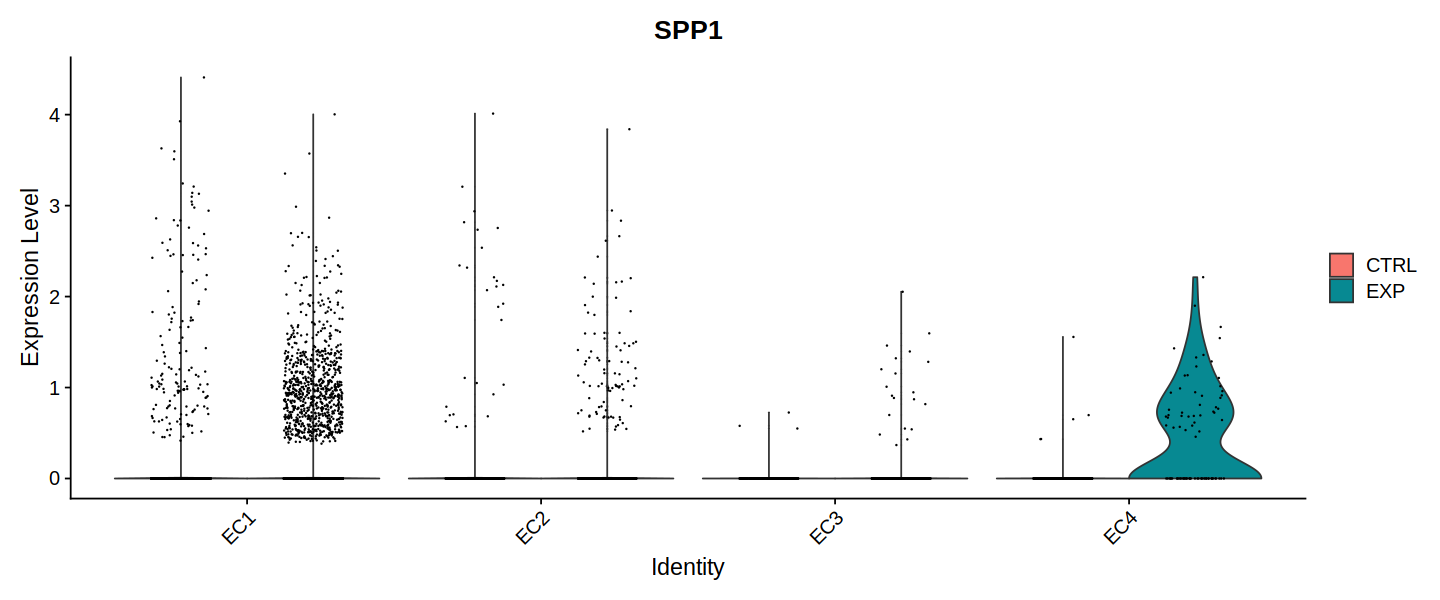

In [6]:
# plot violin
VlnPlot(sample, features = 'SPP1', group.by = "celltype_new", split.by = "condition")

In [9]:
# set split violin function
GeomSplitViolin <- ggplot2::ggproto(
    "GeomSplitViolin",
    ggplot2::GeomViolin,
    draw_group = function(self,
                          data,
                          ...,
                          # add the nudge here
                          nudge = 0,
                          draw_quantiles = NULL) {
        data <- transform(data,
                          xminv = x - violinwidth * (x - xmin),
                          xmaxv = x + violinwidth * (xmax - x))
        grp <- data[1, "group"]
        newdata <- plyr::arrange(transform(data,
                                           x = if (grp %% 2 == 1) xminv else xmaxv),
                                 if (grp %% 2 == 1) y else -y)
        newdata <- rbind(newdata[1, ],
                         newdata,
                         newdata[nrow(newdata), ],
                         newdata[1, ])
        newdata[c(1, nrow(newdata)-1, nrow(newdata)), "x"] <- round(newdata[1, "x"])

        # now nudge them apart
        newdata$x <- ifelse(newdata$group %% 2 == 1,
                            newdata$x - nudge,
                            newdata$x + nudge)

        if (length(draw_quantiles) > 0 & !scales::zero_range(range(data$y))) {

            stopifnot(all(draw_quantiles >= 0), all(draw_quantiles <= 1))

            quantiles <- ggplot2:::create_quantile_segment_frame(data,
                                                             draw_quantiles)
            aesthetics <- data[rep(1, nrow(quantiles)),
                               setdiff(names(data), c("x", "y")),
                               drop = FALSE]
            aesthetics$alpha <- rep(1, nrow(quantiles))
            both <- cbind(quantiles, aesthetics)
            quantile_grob <- ggplot2::GeomPath$draw_panel(both, ...)
            ggplot2:::ggname("geom_split_violin",
                             grid::grobTree(ggplot2::GeomPolygon$draw_panel(newdata, ...),
                                            quantile_grob))
        }
    else {
            ggplot2:::ggname("geom_split_violin",
                             ggplot2::GeomPolygon$draw_panel(newdata, ...))
        }
    }
)

geom_split_violin <- function(mapping = NULL,
                              data = NULL,
                              stat = "ydensity",
                              position = "identity",
                              # nudge param here
                              nudge = 0,
                              ...,
                              draw_quantiles = NULL,
                              trim = TRUE,
                              scale = "area",
                              na.rm = FALSE,
                              show.legend = NA,
                              inherit.aes = TRUE) {

    ggplot2::layer(data = data,
                   mapping = mapping,
                   stat = stat,
                   geom = GeomSplitViolin,
                   position = position,
                   show.legend = show.legend,
                   inherit.aes = inherit.aes,
                   params = list(trim = trim,
                                 scale = scale,
                                 # don't forget the nudge
                                 nudge = nudge,
                                 draw_quantiles = draw_quantiles,
                                 na.rm = na.rm,
                                 ...))
}

In [15]:
# cytokine and chemokine split violins
cytokine_genes <- unique(c('ACKR1','CCL14','PLVAP','IL1R1','IL6ST','EGR1','CCL23','CD74','SAMHD1','UGCG','TNFRSF1A','IL6','NFKBIZ','JAK1','IL3RA','TNFAIP3','PTK2B','IL33','LIMS1','HSPA1A','IL1RL2','FZD4','IRF1','SLC1A1','LIFR','CCL2','ROBO1','NFKBIA','SP100','AKAP12','IL1R1','IL6ST','IFI16','EGR1','CD74','HLA-DPA1','LY96','HSPD1','HLA-DPB1','RPS3','IL6','CD14','CD55','DDX21','ATF4','IL33','BCL3','HSPA1A','IL1RL2','IRF1','HGF','HSP90AA1','PNP','ABL1','CD36','BST2','B2M','CD81','GPRC5B','UBE2J1','RHOB','STMN1','CALM1','SNX18','SNX9','EXOC2','CDC14B','IGF1R','PLK3','AHCTF1','RHOC','EXOC6','PLEC','UVRAG','EXOC6B','RHOB','STMN1','SNX18','SNX9','EXOC2','RHOC','EXOC6','EXOC6B','DENND1B','RSAD2','CD81'))
chemokine_genes <- unique(c('NRP2','SEMA6A','FLRT2','SEMA4A','SEMA3E','ROBO1','EDNRB','CXCL12','PDGFD','PDGFB','RIN3','KDR','ITGA1','PREX1','RAC1','LGALS3','CX3CL1','WNK1','HBEGF','VAV3','PRKD1','ITGA9','CXCL12','PDGFB','KDR','CDH13','LGALS3','CX3CL1','CXCL12','PDGFD','PDGFB','KDR','RAC1','CDH13','WNK1','PRKD1','SEMA3G','VEGFC','FGF2','CXCL12','EFNB2','DUSP1','CDH13','PDGFD','NEDD9','MTUS1','SWAP70','FGF18','PTK2','THBS1','RIN3','SMAD3','MET','ANGPT2','GAS6','CAMK1D','S1PR1','VEGFC','FGF2','CXCL12','DUSP1','PREX1','PDGFD','NEDD9','MTUS1','CXCL2','SWAP70','CXCL3','FGF18','PTK2','CX3CL1','THBS1','RIN3','MET','PDE4B','PARVA','GAS6','CAMK1D','S1PR1','PLEC','NR4A1','MMP2','VEGFC','FGF2','CXCL12','CDH13','PTPRJ','CX3CL1','SMAD3','MET','ANGPT2','S1PR1','PDGFD','FGF2','GAS6','EDN1','SEMA5A','CMKLR1','THBS1','RIPOR2','SERPINE1','FGF18','ANO6','VEGFC','STK39','CAMK1D','CDH13','BMPR2','MDK','TGFB1','CALR','PTK2','MCU','PRKD1','PDGFD','FGF2','MMP2','GAS6','EDN1','SEMA5A','CMKLR1','THBS1','ABCC1','CXCL2','RIPOR2','SERPINE1','MMP28','PARVA','FGF18','ANO6','VEGFC','LOX','STK39','CAMK1D','CXCL3','VCAM1','BSG','MDK','CALR','PTK2','MCU','MTUS1','PRKD1','PPIB','LYST','EFNA5','NTN1','NRG1','SEMA5A','PLXNA4','SEMA7A','ITGAV','SEMA3F'))
cytokine_chemo_genes <- c('ACKR1','CCL14','PLVAP','IL1R1','IL6ST','EGR1','CCL23','CD74','SAMHD1','UGCG','TNFRSF1A','IL6','NFKBIZ','JAK1','IL3RA','TNFAIP3','PTK2B','IL33','LIMS1','HSPA1A','IL1RL2','FZD4','IRF1','SLC1A1','LIFR','CCL2','ROBO1','NFKBIA','SP100','ERI2','RPS21','ERI1','AKAP12','IFI16','HLA-DPA1','LY96','HSPD1','HLA-DPB1','RPS3','CD14','CD55','DDX21','ATF4','BCL3','HGF','HSP90AA1','PNP','ABL1','EDNRB','CXCL12','PDGFD','PDGFB','RIN3','KDR','ITGA1','PREX1','RAC1','LGALS3','CX3CL1','WNK1','HBEGF','VAV3','PRKD1','ITGA9','CDH13','SEMA3G','CD36','BST2','B2M','CD81','GPRC5B','UBE2J1','VEGFC','FGF2','EFNB2','DUSP1','NEDD9','MTUS1','SWAP70','FGF18','PTK2','THBS1','SMAD3','MET','ANGPT2','GAS6','CAMK1D','S1PR1','CXCL2','CXCL3','PDE4B','PARVA','PLEC','NR4A1','MMP2','PTPRJ','RHOB','STMN1','CALM1','SNX18','SNX9','EXOC2','CDC14B','IGF1R','PLK3','AHCTF1','RHOC','EXOC6','UVRAG','EXOC6B','PELI1','PTGER4','LAPTM5','RFTN1','CD46','CD58','PDE4D','ISG15','IFNGR1','LRRK2','AGPAT1','CYBA','NR4A3','FURIN','DENND1B','CEBPB','HEG1','CADM1','SULF2','RSAD2','ARHGEF2','NLRP1','EDN1','SEMA5A','CMKLR1','RIPOR2','SERPINE1','ANO6','STK39','BMPR2','MDK','TGFB1','CALR','MCU','PLXNA4','SEMA7A','MMP28','SEMA3F','ABCC1','LOX','VCAM1','BSG','PPIB','LYST','EFNA5','NTN1','NRG1','ITGAV','SULF1','CLU','GATA6','F2R','PTGS2','CD34','ARFGEF2','PLA2R1','BMPR1A','TMED10','CYP1B1','ARNT','FOXP1','NOD1','TRIM56','ATP6AP2','RAB1A','ZBTB20','PIK3R1','ARID5A','SPP1','NRP2','SEMA6A','FLRT2','SEMA4A','SEMA3E')
ferroptosis_genes <- unique(c("ACSL4", "AIFM2", "AKR1C1", "AKR1C2", "AKR1C3", "ALB", "ALOX12", "ALOX12B", "ALOX15", "ALOX15B", "ALOX5", "ALOXE3", "AMPD2", "ANKRD33B", "AP5Z1", "APOA4", "AQP7", "ATP5MC3", "CARS", "CBS", "CHAC1", "CISD1", "CP", "CPB2", "CPOX", "CS", "CYBB", "CYP1A1", "CYP1B1", "DPP4", "EMC2", "FANCD2", "FPN1", "FTH1", "FTL", "G6PD", "GCLC", "GCLM", "GLS2", "GLYATL1", "GPX4", "GSS", "GSTA1", "GSTA2", "GSTA3", "GSTA4", "GSTA5", "GSTM1", "GSTM2", "GSTM3", "GSTM4", "GSTM5", "GSTO1", "GSTO2", "GSTP1", "GSTT1", "GSTT2", "GSTT2B", "GSTZ1", "HELLS", "HILPDA", "HMGCR", "HMOX1", "HSPB1", "HSPB8", "IREB2", "LPCAT3", "LPIN1", "MAP1LC3A", "MAP1LC3B", "MT1A", "MT1B", "MT1E", "MT1F", "MT1G", "MT1H", "MT1M", "MT1X", "MT2A", "MTDH", "NCOA4", "NFE2L2", "NFKB1", "NQO1", "NQO2", "PANX1", "PCBP1", "PCBP2", "PEBP1", "PGD", "PHKG2", "PLIN2", "PLIN3", "PLIN4", "PML", "PRNP", "PTGS2", "RPL8", "SAT1", "SELENOW", "SLC1A5", "SLC2A1", "SLC2A3", "SLC3A2", "SLC7A11", "SLC7A5", "SLC11A2", "SLC16A1", "SLC38A1", "SLC39A8", "SLC39A14", "SLC40A1", "SQLE", "SRXN1", "STEAP3", "TF", "TFRC", "TNFAIP3", "TP53", "TP63", "TXNRD1", "VDAC2", "VDAC3", "NCO4"))
genes <- unique(c(cytokine_genes, chemokine_genes, cytokine_chemo_genes, ferroptosis_genes))
genes <- intersect(genes, rownames(sample))

for (gene in genes) {
    # gene <- "VEGFC"
    expression_data <- FetchData(sample, vars = c(gene, "condition", "celltype_new"))
    colnames(expression_data)[1] <- "gene_name"
    
    # summary for mean and std err bar
    expression_data_summary <- Rmisc::summarySE(expression_data, measurevar="gene_name", groupvars=c("condition","celltype_new"))
    
    # plot split violin
    ggplot(expression_data, aes(x = celltype_new, y = gene_name, fill = condition)) +
      geom_split_violin(color="grey60", nudge = 0.01) + 
    geom_point(data = expression_data_summary, aes(x = celltype_new, y = gene_name), pch=19, position=position_dodge(0.2), size = 1) + 
    geom_errorbar(data = expression_data_summary, aes(ymin = gene_name-ci, ymax = gene_name+ci), width = 0.05, position= position_dodge(0.2), color="black",alpha = 0.7,size= 0.5) +
    stat_compare_means(aes(group = condition), label = "p.format", method = "wilcox.test", size = 3, label.y = max(expression_data$gene_name), hide.ns = F) + 
    scale_fill_manual(values = c("#b1d6fb", "#fd9999")) + labs(title = gene, y = "Expression") + theme_classic() + theme(plot.title = element_text(hjust = 0.5))
    ggsave(paste0("./figure/splitViolins/", gene, ".pdf"), width = 6, height = 4)
}

In [16]:
# ferroptosis
ferroptosis_genes <- unique(c("ACSL4", "AIFM2", "AKR1C1", "AKR1C2", "AKR1C3", "ALB", "ALOX12", "ALOX12B", "ALOX15", "ALOX15B", "ALOX5", "ALOXE3", "AMPD2", "ANKRD33B", "AP5Z1", "APOA4", "AQP7", "ATP5MC3", "CARS", "CBS", "CHAC1", "CISD1", "CP", "CPB2", "CPOX", "CS", "CYBB", "CYP1A1", "CYP1B1", "DPP4", "EMC2", "FANCD2", "FPN1", "FTH1", "FTL", "G6PD", "GCLC", "GCLM", "GLS2", "GLYATL1", "GPX4", "GSS", "GSTA1", "GSTA2", "GSTA3", "GSTA4", "GSTA5", "GSTM1", "GSTM2", "GSTM3", "GSTM4", "GSTM5", "GSTO1", "GSTO2", "GSTP1", "GSTT1", "GSTT2", "GSTT2B", "GSTZ1", "HELLS", "HILPDA", "HMGCR", "HMOX1", "HSPB1", "HSPB8", "IREB2", "LPCAT3", "LPIN1", "MAP1LC3A", "MAP1LC3B", "MT1A", "MT1B", "MT1E", "MT1F", "MT1G", "MT1H", "MT1M", "MT1X", "MT2A", "MTDH", "NCOA4", "NFE2L2", "NFKB1", "NQO1", "NQO2", "PANX1", "PCBP1", "PCBP2", "PEBP1", "PGD", "PHKG2", "PLIN2", "PLIN3", "PLIN4", "PML", "PRNP", "PTGS2", "RPL8", "SAT1", "SELENOW", "SLC1A5", "SLC2A1", "SLC2A3", "SLC3A2", "SLC7A11", "SLC7A5", "SLC11A2", "SLC16A1", "SLC38A1", "SLC39A8", "SLC39A14", "SLC40A1", "SQLE", "SRXN1", "STEAP3", "TF", "TFRC", "TNFAIP3", "TP53", "TP63", "TXNRD1", "VDAC2", "VDAC3", "NCO4"))
ferroptosis_genes <- intersect(ferroptosis_genes, rownames(sample))
for (gene in ferroptosis_genes) {
    # gene <- "VEGFC"
    expression_data <- FetchData(sample, vars = c(gene, "condition", "celltype_new"))
    colnames(expression_data)[1] <- "gene_name"
    
    # summary for mean and std err bar
    expression_data_summary <- Rmisc::summarySE(expression_data, measurevar="gene_name", groupvars=c("condition","celltype_new"))
    
    # plot split violin
    ggplot(expression_data, aes(x = celltype_new, y = gene_name, fill = condition)) +
      geom_split_violin(color="white", nudge = 0.01) + 
    geom_point(data = expression_data_summary, aes(x = celltype_new, y = gene_name), pch=19, position=position_dodge(0.2), size = 1) + 
    geom_errorbar(data = expression_data_summary, aes(ymin = gene_name-ci, ymax = gene_name+ci), width = 0.05, position= position_dodge(0.2), color="black",alpha = 0.7,size= 0.5) +
    stat_compare_means(aes(group = condition), label = "p.format", method = "wilcox.test", size = 3, label.y = max(expression_data$gene_name), hide.ns = F) + 
    scale_fill_manual(values = c("#b1d6fb", "#fd9999")) + labs(title = gene, y = "Expression") + theme_classic() + theme(plot.title = element_text(hjust = 0.5))
    ggsave(paste0("./figure/Ferroptosis/", gene, ".pdf"), width = 6, height = 4)
}

In [17]:
# set risk level
patient <- c('CTRL220424','CTRL220519','CTRL220615','EXP220304','EXP220406','EXP230206')
risk <- c('Normal','Normal','Normal','High','Low','Medium')
sample$risk_level = plyr::mapvalues(x=sample$orig.ident, from=patient, to=risk)
sample$risk_level <- factor(sample$risk_level, levels = c("Normal", "Low", "Medium", "High"))
Idents(sample) <- sample$risk_level

In [18]:
# plot violin
ferroptosis_genes <- unique(c("SPP1", "ACSL4", "AIFM2", "AKR1C1", "AKR1C2", "AKR1C3", "ALB", "ALOX12", "ALOX12B", "ALOX15", "ALOX5", "ALOXE3", "AMPD2", "ANKRD33B", "AP5Z1", "APOA4", "AQP7", "ATP5MC3", "CARS", "CBS", "CHAC1", "CISD1", "CP", "CPB2", "CPOX", "CS", "CYBB", "CYP1A1", "CYP1B1", "DPP4", "EMC2", "FANCD2", "FPN1", "FTH1", "FTL", "G6PD", "GCLC", "GCLM", "GLS2", "GLYATL1", "GPX4", "GSS", "GSTA4", "GSTM1", "GSTM2", "GSTM3", "GSTM4", "GSTM5", "GSTO1", "GSTO2", "GSTP1", "GSTT1", "GSTT2", "GSTT2B", "GSTZ1", "HELLS", "HILPDA", "HMGCR", "HMOX1", "HSPB1", "HSPB8", "IREB2", "LPCAT3", "LPIN1", "MAP1LC3A", "MAP1LC3B", "MT1A", "MT1E", "MT1F", "MT1G", "MT1H", "MT1M", "MT1X", "MT2A", "MTDH", "NCOA4", "NFE2L2", "NFKB1", "NQO1", "NQO2", "PANX1", "PCBP1", "PCBP2", "PEBP1", "PGD", "PHKG2", "PLIN2", "PLIN3", "PLIN4", "PML", "PRNP", "PTGS2", "RPL8", "SAT1", "SELENOW", "SLC1A5", "SLC2A1", "SLC2A3", "SLC3A2", "SLC7A11", "SLC7A5", "SLC11A2", "SLC16A1", "SLC38A1", "SLC39A8", "SLC39A14", "SLC40A1", "SQLE", "SRXN1", "STEAP3", "TF", "TFRC", "TNFAIP3", "TP53", "TP63", "TXNRD1", "VDAC2", "VDAC3", "NCO4"))
ferroptosis_genes <- intersect(ferroptosis_genes, rownames(sample))
# ferroptosis_genes <- "ALOX5"
for (gene in ferroptosis_genes) {
    expression_data <- FetchData(sample, vars = c(gene, "risk_level"))
    colnames(expression_data)[1] <- "gene_name"
        
    # summary for mean and std err bar
    expression_data_summary <- Rmisc::summarySE(expression_data, measurevar="gene_name", groupvars=c("risk_level"))
    expression_data_summary
    
    # set comparison
    my_comparisons <- list(c("Normal", "Low"), c("Normal", "Medium"), c("Normal", "High"), c("Low", "High"))
    
    # plot split violin
    ggplot(expression_data, aes(x = risk_level, y = gene_name, color = risk_level)) +
    geom_violin(fill="white") + 
    geom_boxplot(width = 0.1, color = "grey10", alpha = 0, fill = NA) +
    #geom_point(data = expression_data_summary, aes(x = risk_level, y = gene_name), pch=19, position=position_dodge(0.2), size = 1) + 
    #geom_errorbar(data = expression_data_summary, aes(ymin = gene_name-ci, ymax = gene_name+ci), width = 0.05, position= position_dodge(0.2), color="black",alpha = 0.7,size= 0.5) +
    stat_compare_means(comparisons = my_comparisons, size = 3, hide.ns = F) + stat_compare_means(label.y = max(expression_data$gene_name) + 1.8) + 
    labs(title = gene, y = "Expression") + theme_classic() + theme(plot.title = element_text(hjust = 0.5))
    ggsave(paste0("./figure/Ferroptosis_risk/", gene, ".pdf"), width = 6, height = 4)
}

In [19]:
# find degs between CTRL and EXP EC4
Idents(sample) <- sample$celltype_new
sample_EC4 <- subset(sample, idents = "EC4")
Idents(sample_EC4) <- sample_EC4$condition
degs_EC4 <- FindMarkers(sample_EC4, `ident.1` = "EXP", `ident.2` = "CTRL", logfc.threshold = 0)
write.csv(degs_EC4, "./meta/degs_EC4.csv")
head(degs_EC4)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SPP1,2.030358e-57,0.8973005,0.500,0.009,6.809414e-53
IGHA1,2.352431e-57,0.9838608,0.477,0.006,7.889582e-53
CCL3L1,1.053216e-49,0.6361871,0.384,0.000,3.532277e-45
IGHG4,8.734136e-42,0.9212609,0.419,0.015,2.929255e-37
IL1B,3.124640e-40,0.7584002,0.326,0.002,1.047942e-35
IGKC,1.800318e-37,3.1412709,0.721,0.112,6.037906e-33


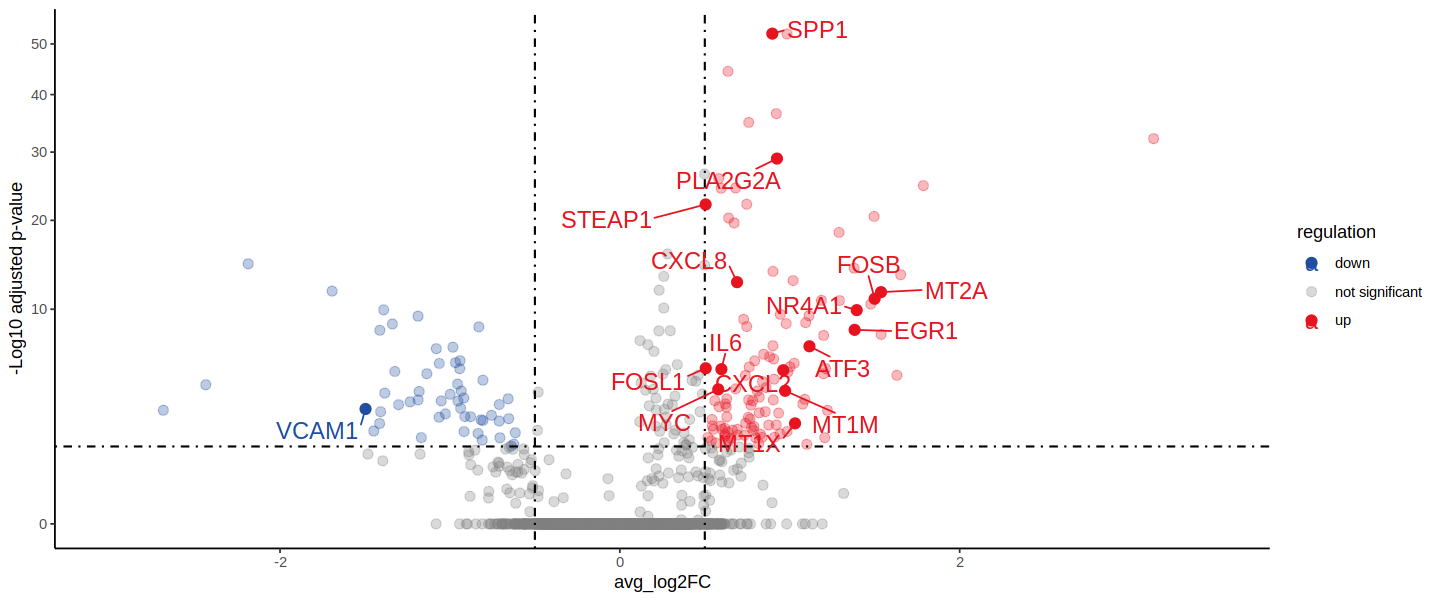

In [20]:
# plot volcano
data_deg <- read.csv("./meta/degs_EC4.csv", row.names = 1)

# volcano plot
data_deg$gene_name <- rownames(data_deg)
data_deg$regulation <- "not significant"
data_deg$regulation[data_deg$avg_log2FC >= 0.5 & data_deg$p_val_adj <= 0.05] <- 'up'
data_deg$regulation[data_deg$avg_log2FC <= -0.5 & data_deg$p_val_adj <= 0.05] <- "down"
# data_deg$regulation[data_deg$avg_log2FC == 0] <- "equal"

# grey plot
p <- ggplot(data = data_deg,
            aes(x = avg_log2FC, y = -log10(p_val_adj), color = regulation)) +
  geom_point(alpha = 0.3, size = 2.5) + 
  geom_vline(xintercept = c(-0.5, 0.5), lty = 4, col = "black", lwd = 0.6) +
  geom_hline(yintercept = -log10(0.05), lty = 4, col = "black", lwd = 0.6) +
  theme_classic()

# add genes
for_label <- subset(data_deg, abs(data_deg$avg_log2FC) >= 0.5 & data_deg$p_val_adj <= 0.05) %>% filter(gene_name %in% unique(c(head(rownames(data_deg), 15), head(rownames(data_deg[order(data_deg$avg_log2FC), ]), 5))))
selected_genes <- c('STEAP1','PLA2G2A','STEAP1','CXCL8','MT2A','FOSB','NR4A1','EGR1','ATF3','FOSL1','IL6','CXCL2','MYC','MT1M','MT1X','SPP1','VCAM1')
for_label <- data_deg %>% filter(gene_name %in% selected_genes)
p +
  geom_point(size = 2.75, data = for_label, aes(color = regulation)) +
  ggrepel::geom_text_repel(aes(label = gene_name, color = regulation), max.overlaps = 100, size = 5,
                           data = for_label, min.segment.length = 0, seed = 42, box.padding = 0.5) + scale_color_manual(values=c("#1F4DA0", "grey50", "#E71420")) + 
  xlim(-3, 3.5) + scale_y_sqrt() + ylab("-Log10 adjusted p-value")
# ggsave("./figure/Volcano_plot_EXP_vs_CTRL_EC7.pdf", width = 8, height = 6)

In [21]:
# functional enrichment
degs_all <- read.csv("./meta/degs_EC4.csv", row.names = 1, check.names = F, stringsAsFactors = F)
degs_significant <- subset(degs_all, abs(avg_log2FC) >= 0.5 & p_val_adj <= 0.05)

degs_down <- rownames(subset(degs_significant, avg_log2FC < 0))
degs_down_transfered <- bitr(degs_down, fromType = 'SYMBOL', toType = 'ENTREZID', OrgDb = "org.Hs.eg.db")
degs_down_id <- degs_down_transfered$ENTREZID

ego_down <- enrichGO(gene = degs_down,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.1,
                qvalueCutoff  = 0.05)
write.csv(ego_down, "meta/GO_down_EXP_vs_CTRL_EC4.csv")

kk_down <- enrichKEGG(gene = degs_down_id,
                 organism  = 'hsa',
                 pvalueCutoff = 0.05)
kk_down_readable <- setReadable(kk_down, OrgDb = org.Hs.eg.db, keyType = "ENTREZID")
write.csv(kk_down_readable, "meta/KEGG_down_EXP_vs_CTRL_EC4.csv")

degs_up <- rownames(subset(degs_significant, avg_log2FC > 0))
degs_up_transfered <- bitr(degs_up, fromType = 'SYMBOL', toType = 'ENTREZID', OrgDb = "org.Hs.eg.db")
degs_up_id <- degs_up_transfered$ENTREZID

ego_up <- enrichGO(gene = degs_up,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.1,
                qvalueCutoff  = 0.05)
write.csv(ego_up, "meta/GO_up_EXP_vs_CTRL_EC4.csv")

kk_up <- enrichKEGG(gene = degs_up_id,
                 organism  = 'hsa',
                 pvalueCutoff = 0.05)
kk_up_readable <- setReadable(kk_up, OrgDb = org.Hs.eg.db, keyType = "ENTREZID")
write.csv(kk_up_readable, "meta/KEGG_up_EXP_vs_CTRL_EC4.csv")

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(degs_down, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
“5.66% of input gene IDs are fail to map...”
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(degs_up, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
“10.43% of input gene IDs are fail to map...”


In [22]:
# find degs between CTRL and EXP EC1
Idents(sample) <- sample$celltype_new
sample_EC1 <- subset(sample, idents = "EC1")
Idents(sample_EC1) <- sample_EC1$condition
degs_EC1 <- FindMarkers(sample_EC1, `ident.1` = "EXP", `ident.2` = "CTRL", logfc.threshold = 0)
write.csv(degs_EC1, "./meta_final/degs_EC1.csv")
head(degs_EC1)

# find degs between CTRL and EXP EC2
Idents(sample) <- sample$celltype_new
sample_EC2 <- subset(sample, idents = "EC2")
Idents(sample_EC2) <- sample_EC2$condition
degs_EC2 <- FindMarkers(sample_EC2, `ident.1` = "EXP", `ident.2` = "CTRL", logfc.threshold = 0)
write.csv(degs_EC2, "./meta_final/degs_EC2.csv")
head(degs_EC2)

# find degs between CTRL and EXP EC3
Idents(sample) <- sample$celltype_new
sample_EC3 <- subset(sample, idents = "EC3")
Idents(sample_EC3) <- sample_EC3$condition
degs_EC3 <- FindMarkers(sample_EC3, `ident.1` = "EXP", `ident.2` = "CTRL", logfc.threshold = 0)
write.csv(degs_EC3, "./meta_final/degs_EC3.csv")
head(degs_EC3)

# find degs between CTRL and EXP EC4
Idents(sample) <- sample$celltype_new
sample_EC4 <- subset(sample, idents = "EC4")
Idents(sample_EC4) <- sample_EC4$condition
degs_EC4 <- FindMarkers(sample_EC4, `ident.1` = "EXP", `ident.2` = "CTRL", logfc.threshold = 0)
write.csv(degs_EC4, "./meta_final/degs_EC4.csv")
head(degs_EC4)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SPSB1,0,0.7217633,0.508,0.153,0
RPL11,0,-0.4915306,0.989,0.997,0
TPO,0,1.1706240,0.483,0.150,0
FN1,0,-1.0495545,0.299,0.691,0
STOX2,0,0.9268124,0.694,0.329,0
C7,0,-1.1124174,0.709,0.837,0


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGP,4.721735e-79,-1.9842341,0.753,0.962,1.583575e-74
CDH13,1.058326e-71,1.6521094,0.858,0.407,3.549413e-67
RPL8,5.482645e-55,-0.9127613,0.935,0.965,1.838769e-50
RPS11,3.179432e-50,-0.8692244,0.851,0.945,1.066318e-45
RPL27A,1.259553e-47,-0.8173312,0.819,0.933,4.224289e-43
RPL13,4.055635e-47,-0.7379385,0.970,0.992,1.360179e-42


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CDH13,1.204563e-70,1.590060,0.989,0.550,4.039863e-66
NEAT1,2.517318e-46,1.504572,0.983,0.883,8.442580e-42
PLEKHG1,4.598071e-45,1.546738,0.959,0.742,1.542101e-40
CFD,1.810373e-44,-2.581155,0.358,0.693,6.071628e-40
RPS26,4.309050e-44,1.035702,0.899,0.645,1.445169e-39
BACE2,8.779281e-42,1.707670,0.837,0.453,2.944395e-37


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SPP1,2.030358e-57,0.8973005,0.500,0.009,6.809414e-53
IGHA1,2.352431e-57,0.9838608,0.477,0.006,7.889582e-53
CCL3L1,1.053216e-49,0.6361871,0.384,0.000,3.532277e-45
IGHG4,8.734136e-42,0.9212609,0.419,0.015,2.929255e-37
IL1B,3.124640e-40,0.7584002,0.326,0.002,1.047942e-35
IGKC,1.800318e-37,3.1412709,0.721,0.112,6.037906e-33


In [23]:
# add cluster to degs
degs_EC1$cluster <- 'EC1'
degs_EC1$gene <- rownames(degs_EC1)
degs_EC2$cluster <- 'EC2'
degs_EC2$gene <- rownames(degs_EC2)
degs_EC3$cluster <- 'EC3'
degs_EC3$gene <- rownames(degs_EC3)
degs_EC4$cluster <- 'EC4'
degs_EC4$gene <- rownames(degs_EC4)

degs_EC_all <- rbind(degs_EC1, degs_EC2, degs_EC3, degs_EC4)
write.csv(degs_EC_all, "meta_final/degs_EC_all.csv")

In [24]:
# GO_BP Analysis using clusterProfiler
library(gtools)
markers <- read.csv("./meta_final/degs_EC_all.csv", row.names = 1)
markers_seurat_significant <- subset(markers, abs(avg_log2FC) >= 0.5 & p_val_adj <= 0.05)

# Get Unique cell type
celltypes <- unique(markers_seurat_significant$cluster)

# Initialize a empty list to store GO_BP results
go_results <- list()

# GO_BP analysis for each cell types
for (celltype in celltypes) {
    marker_genes <- markers_seurat_significant$gene[markers_seurat_significant$cluster == celltype]
    
    # Skip cell types with less than 20 significant marker genes
    if (length(marker_genes) < 10){
        next
    }
    
    #  Perform GO_BP enrichment analysis
    ego <- enrichGO(gene = marker_genes, 
                    OrgDb = org.Hs.eg.db,
                    keyType = 'SYMBOL',
                    ont = 'BP',
                    pAdjustMethod = 'BH',
                    pvalueCutoff = 0.05,
                    qvalueCutoff = 0.05)
    
    # Remove redundant GO_BP terms
    # ego_simplified <- simplify(ego, cutoff = 0.9, by = "p.adjust", select_fun = min)
    ego_simplified <- ego
    if (nrow(ego_simplified@result) > 0) {
        
        # Add celltype column to the simplified GO_BP result
        ego_simplified@result$celltype <- celltype
        
        # Store the GO_BP in go_results
        go_results[[celltype]] <- ego_simplified
    }
}

# Merge GO_BP results from all cell types
merged_go_results <- do.call(rbind, lapply(go_results, function(x) x@result))

# Move the celltype columns to the first column
merged_go_results <- merged_go_results[, c('celltype', setdiff(colnames(merged_go_results), 'celltype'))]

# sort the celltype column and save the data
merged_go_results <- merged_go_results[mixedorder(merged_go_results$celltype, merged_go_results$p.adjust, decreasing = F), ]
write.table(merged_go_results, './meta_final/EC_sub_CAD_vs_DCM_degs_GO_BP.tsv', sep = '\t', quote = F, row.names = F, col.names = T)
head(merged_go_results)

# subset the significant GO_BP enrichment results
merged_go_results_significant <- subset(merged_go_results, p.adjust <= 0.05)
write.table(merged_go_results_significant, './meta_final/EC_sub_CAD_vs_DCM_degs_GO_BP_significant.tsv', sep = '\t', quote = F, row.names = F, col.names = T)
head(merged_go_results_significant)

,celltype,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
EC1.GO:0002181,EC1,GO:0002181,cytoplasmic translation,12/171,159/18614,2.715535e-08,7.255911e-05,6.468691e-05,RPL8/RPL12/RPL27A/RPS26/RPS11/RPL9/RPL18/RPS3/RPL13A/RPL7A/RPS3A/RPS5,12
EC1.GO:0045785,EC1,GO:0045785,positive regulation of cell adhesion,18/171,482/18614,5.015610e-07,5.838659e-04,5.205202e-04,FN1/CDH13/RPS3/HLA-DRB5/HLA-DQA2/CD36/ZBTB16/PRKCE/CD81/HSPH1/HSPD1/ACTB/NFAT5/CCDC80/HLA-DQB1/LGALS1/IGFBP2/SELE,18
EC1.GO:0022407,EC1,GO:0022407,regulation of cell-cell adhesion,18/171,491/18614,6.555381e-07,5.838659e-04,5.205202e-04,RPS3/HLA-DRB5/IRF1/HLA-DQA2/ZBTB16/C1QTNF1/CD81/HSPH1/HSPD1/ACTB/NFAT5/HLA-DQB1/CD9/LGALS1/IGFBP2/PRKG1/SELE/RGCC,18
EC1.GO:0007599,EC1,GO:0007599,hemostasis,12/171,230/18614,1.485021e-06,7.992117e-04,7.125024e-04,CD36/F8/MYL12A/C1QTNF1/CLIC1/FLI1/ACTB/CD9/PRKG1/ACTG1/PLAT/FBLN1,12
EC1.GO:1903039,EC1,GO:1903039,positive regulation of leukocyte cell-cell adhesion,13/171,273/18614,1.495531e-06,7.992117e-04,7.125024e-04,RPS3/HLA-DRB5/HLA-DQA2/ZBTB16/CD81/HSPH1/HSPD1/ACTB/NFAT5/HLA-DQB1/LGALS1/IGFBP2/SELE,13
EC1.GO:0070527,EC1,GO:0070527,platelet aggregation,7/171,73/18614,4.777933e-06,2.127773e-03,1.896923e-03,MYL12A/C1QTNF1/CLIC1/ACTB/CD9/PRKG1/ACTG1,7


,celltype,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
EC1.GO:0002181,EC1,GO:0002181,cytoplasmic translation,12/171,159/18614,2.715535e-08,7.255911e-05,6.468691e-05,RPL8/RPL12/RPL27A/RPS26/RPS11/RPL9/RPL18/RPS3/RPL13A/RPL7A/RPS3A/RPS5,12
EC1.GO:0045785,EC1,GO:0045785,positive regulation of cell adhesion,18/171,482/18614,5.015610e-07,5.838659e-04,5.205202e-04,FN1/CDH13/RPS3/HLA-DRB5/HLA-DQA2/CD36/ZBTB16/PRKCE/CD81/HSPH1/HSPD1/ACTB/NFAT5/CCDC80/HLA-DQB1/LGALS1/IGFBP2/SELE,18
EC1.GO:0022407,EC1,GO:0022407,regulation of cell-cell adhesion,18/171,491/18614,6.555381e-07,5.838659e-04,5.205202e-04,RPS3/HLA-DRB5/IRF1/HLA-DQA2/ZBTB16/C1QTNF1/CD81/HSPH1/HSPD1/ACTB/NFAT5/HLA-DQB1/CD9/LGALS1/IGFBP2/PRKG1/SELE/RGCC,18
EC1.GO:0007599,EC1,GO:0007599,hemostasis,12/171,230/18614,1.485021e-06,7.992117e-04,7.125024e-04,CD36/F8/MYL12A/C1QTNF1/CLIC1/FLI1/ACTB/CD9/PRKG1/ACTG1/PLAT/FBLN1,12
EC1.GO:1903039,EC1,GO:1903039,positive regulation of leukocyte cell-cell adhesion,13/171,273/18614,1.495531e-06,7.992117e-04,7.125024e-04,RPS3/HLA-DRB5/HLA-DQA2/ZBTB16/CD81/HSPH1/HSPD1/ACTB/NFAT5/HLA-DQB1/LGALS1/IGFBP2/SELE,13
EC1.GO:0070527,EC1,GO:0070527,platelet aggregation,7/171,73/18614,4.777933e-06,2.127773e-03,1.896923e-03,MYL12A/C1QTNF1/CLIC1/ACTB/CD9/PRKG1/ACTG1,7


In [25]:
# KEGG Analysis using clusterProfiler
library(gtools)
markers <- read.csv("./meta_final/degs_EC_all.csv", row.names = 1)
markers_seurat_significant <- subset(markers, abs(avg_log2FC) >= 0.5 & p_val_adj <= 0.05)

# Get Unique cell type
celltypes <- unique(markers_seurat_significant$cluster)

# Initialize a empty list to store GO_BP results
kegg_results <- list()

# KEGG analysis for each cell types
for (celltype in celltypes) {
    marker_genes <- markers_seurat_significant$gene[markers_seurat_significant$cluster == celltype]
    
    # Skip cell types with less than 20 significant marker genes
    if (length(marker_genes) < 10){
        next
    }

    degs_transfered <- bitr(marker_genes, fromType = 'SYMBOL', toType = 'ENTREZID', OrgDb = "org.Hs.eg.db")
    degs_id <- degs_transfered$ENTREZID
    
    kk <- enrichKEGG(gene = degs_id,
                 organism  = 'hsa',
                 pvalueCutoff = 0.1)
    kk_readable <- setReadable(kk, OrgDb = org.Hs.eg.db, keyType = "ENTREZID")
    if (nrow(kk_readable@result) > 0) {
        
        # Add celltype column to the simplified GO_BP result
        kk_readable@result$celltype <- celltype
        
        # Store the GO_BP in kegg_results
        kegg_results[[celltype]] <- kk_readable
    }
}

# Merge GO_BP results from all cell types
merged_kegg_results <- do.call(rbind, lapply(kegg_results, function(x) x@result))

# Move the celltype columns to the first column
merged_kegg_results <- merged_kegg_results[, c('celltype', setdiff(colnames(merged_kegg_results), 'celltype'))]

# sort the celltype column and save the data
merged_kegg_results <- merged_kegg_results[mixedorder(merged_kegg_results$celltype, merged_kegg_results$p.adjust, decreasing = F), ]
write.table(merged_kegg_results, './meta_final/EC_sub_CAD_vs_DCM_degs_KEGG.tsv', sep = '\t', quote = F, row.names = F, col.names = T)
head(merged_kegg_results)

# subset the significant GO_BP enrichment results
merged_kegg_results_significant <- subset(merged_kegg_results, p.adjust <= 0.05)
write.table(merged_kegg_results_significant, './meta_final/EC_sub_CAD_vs_DCM_degs_KEGG_significant.tsv', sep = '\t', quote = F, row.names = F, col.names = T)
head(merged_kegg_results_significant)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(marker_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“6.19% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(marker_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“4.2% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(marker_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“3.87% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(marker_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“8.93% of input gene IDs are fail to map...”


,celltype,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
EC1.hsa05171,EC1,hsa05171,Coronavirus disease - COVID-19,16/104,238/8541,2.388738e-08,4.705814e-06,3.746547e-06,C7/RPL8/RPL12/RPL27A/RPS26/CFD/RPS11/RPL9/RPL18/RPS3/RPL13A/RPL7A/RPS3A/MX1/MX2/RPS5,16
EC1.hsa03010,EC1,hsa03010,Ribosome,12/104,172/8541,1.049562e-06,1.033819e-04,8.230779e-05,RPL8/RPL12/RPL27A/RPS26/RPS11/RPL9/RPL18/RPS3/RPL13A/RPL7A/RPS3A/RPS5,12
EC1.hsa04611,EC1,hsa04611,Platelet activation,8/104,126/8541,1.414569e-04,9.289002e-03,7.395465e-03,ITPR2/MYL12A/MYL12B/COL1A2/PLCB4/ACTB/PRKG1/ACTG1,8
EC1.hsa05416,EC1,hsa05416,Viral myocarditis,6/104,70/8541,1.967369e-04,9.689292e-03,7.714157e-03,HLA-DRB5/HLA-DQA2/ICAM1/ACTB/HLA-DQB1/ACTG1,6
EC1.hsa05418,EC1,hsa05418,Fluid shear stress and atherosclerosis,8/104,141/8541,3.068477e-04,1.208980e-02,9.625327e-03,SQSTM1/ICAM1/ACTB/ACTG1/HMOX1/PLAT/HSP90AA1/SELE,8
EC1.hsa05131,EC1,hsa05131,Shigellosis,10/104,250/8541,8.985051e-04,2.607181e-02,2.075715e-02,ELMO1/ITPR2/MYL12A/MYL12B/PRKCE/SQSTM1/PLCB4/CYTH1/ACTB/ACTG1,10


,celltype,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
EC1.hsa05171,EC1,hsa05171,Coronavirus disease - COVID-19,16/104,238/8541,2.388738e-08,4.705814e-06,3.746547e-06,C7/RPL8/RPL12/RPL27A/RPS26/CFD/RPS11/RPL9/RPL18/RPS3/RPL13A/RPL7A/RPS3A/MX1/MX2/RPS5,16
EC1.hsa03010,EC1,hsa03010,Ribosome,12/104,172/8541,1.049562e-06,1.033819e-04,8.230779e-05,RPL8/RPL12/RPL27A/RPS26/RPS11/RPL9/RPL18/RPS3/RPL13A/RPL7A/RPS3A/RPS5,12
EC1.hsa04611,EC1,hsa04611,Platelet activation,8/104,126/8541,1.414569e-04,9.289002e-03,7.395465e-03,ITPR2/MYL12A/MYL12B/COL1A2/PLCB4/ACTB/PRKG1/ACTG1,8
EC1.hsa05416,EC1,hsa05416,Viral myocarditis,6/104,70/8541,1.967369e-04,9.689292e-03,7.714157e-03,HLA-DRB5/HLA-DQA2/ICAM1/ACTB/HLA-DQB1/ACTG1,6
EC1.hsa05418,EC1,hsa05418,Fluid shear stress and atherosclerosis,8/104,141/8541,3.068477e-04,1.208980e-02,9.625327e-03,SQSTM1/ICAM1/ACTB/ACTG1/HMOX1/PLAT/HSP90AA1/SELE,8
EC1.hsa05131,EC1,hsa05131,Shigellosis,10/104,250/8541,8.985051e-04,2.607181e-02,2.075715e-02,ELMO1/ITPR2/MYL12A/MYL12B/PRKCE/SQSTM1/PLCB4/CYTH1/ACTB/ACTG1,10


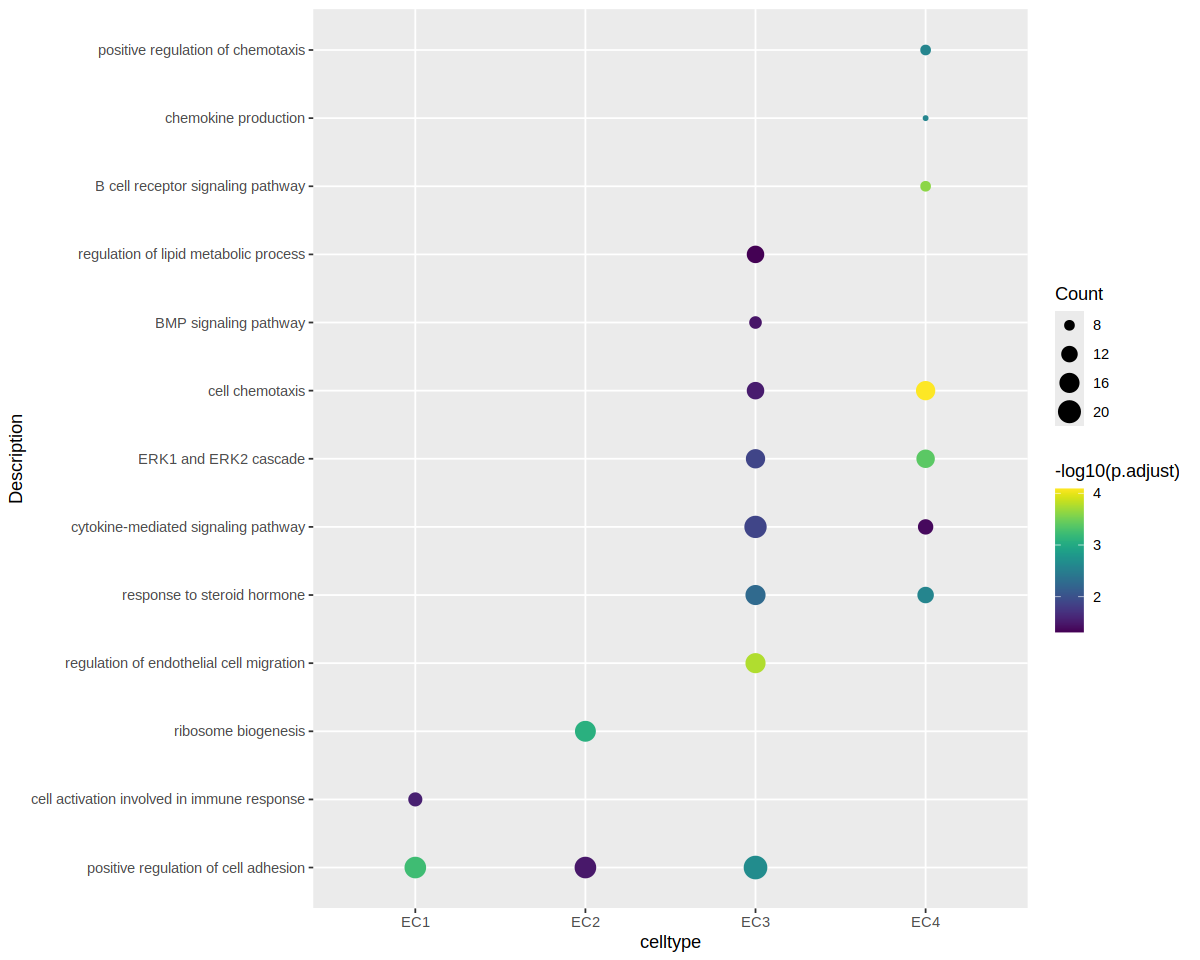

In [26]:
# GO enrichment
options(repr.plot.width = 10, repr.plot.height = 8)
merged_go_results_significant <- read.table("./meta_final/EC_sub_EXP_vs_CTRL_degs_GO_BP_significant.tsv", sep = '\t', header = T, check.names = F, stringsAsFactors = F, quote = "")
# top_go_terms_selected <- c('response to oxygen levels','negative regulation of phosphorylation','MHC class II protein complex assembly','positive regulation of cell-cell adhesion','signal transduction by p53 class mediator','ribosome assembly','endothelium development','actin filament organization','cell chemotaxis','endothelium development','actin filament organization','small GTPase mediated signal transduction','heart morphogenesis','canonical Wnt signaling pathway','cell-substrate adhesion','ossification','response to transforming growth factor beta','Wnt signaling pathway','extracellular matrix organization','response to hypoxia')
# top_go_terms_selected <- grep("cytok|Cytok|Chemo|chemo", merged_go_results_significant$Description, value = T)
# top_go_terms_selected <- c('positive regulation of cytokine production','regulation of chemotaxis','endothelial cell chemotaxis','cytokine-mediated signaling pathway','cell chemotaxis','cell chemotaxis','chemokine production','regulation of chemotaxis','positive regulation of chemotaxis','chemokine (C-X-C motif) ligand 2 production','response to chemokine','positive chemotaxis','cytokine-mediated signaling pathway','positive regulation of cell adhesion','regulation of cell-cell adhesion','ribosome assembly')
top_go_terms_selected <- c('ossification','BMP signaling pathway','cell activation involved in immune response','regulation of lipid metabolic process','B cell receptor signaling pathway','positive regulation of cell adhesion','cytokine-mediated signaling pathway','regulation of endothelial cell migration','cell chemotaxis','response to steroid hormone','chemokine production','positive regulation of chemotaxis','ERK1 and ERK2 cascade','ribosome biogenesis')
go_bp_selected <- merged_go_results_significant[which(merged_go_results_significant$Description %in% top_go_terms_selected), ]
go_bp_selected$Description <- factor(go_bp_selected$Description, levels = unique(go_bp_selected$Description))
# go_bp_selected$celltype <- factor(go_bp_selected$celltype, levels = c("VEC", "EC5", "EC6", "EC7"))
ggplot(go_bp_selected, aes(x = celltype, y = Description, color = -log10(p.adjust), size = Count)) + geom_point() + scale_color_viridis()
ggsave("./figure/EC_sub_CAD_DCM_degs_GO_annotation_cytokine_chemokine.pdf", width = 5.5, height = 3.5)

In [27]:
# list the session info
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/zju/ty/miniconda/envs/singlecell/lib/libopenblasp-r0.3.3.so;  LAPACK version 3.8.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

time zone: Asia/Shanghai
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] gtools_3.9.4          cowplot_1.1.1         ggrepel_0.9.4        
 [4] RColorBrewer_1.1-3    viridis_0.6.4         viridisLite_0.4.2    
 [7] ggsci_3.0.0           Hmisc_5.1-1           Matrix_1.6-1.1    